In [56]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab

In [57]:
pip install pyodbc

Note: you may need to restart the kernel to use updated packages.


In [58]:
#load file

xls = pd.ExcelFile('/Users/sravanthi/Documents/XN_Draft.xlsx')
file = pd.read_excel(xls, 'Sheet1')
df2 = pd.read_excel(xls, 'Sheet2')

file = pd.read_excel("XN_Draft.xlsx")
file['Year'] = file.Date.dt.year
file['Month'] = file.Date.dt.month
file['day'] = file.Date.dt.day
file['week'] = file.Date.dt.week
file.head()

file['Year'] = file.Year.astype(int)
file['Month'] = file.Month.astype(int)
file['day'] = file.day.astype(int)
file['week']= file.week.astype(int)

potential_customers_2016 = file[file['Year'] == 2016]

In [59]:
file.head()

,Date,Website_action,Media,FrequencyOfVoice,Potential_Customers,Articles_per_month,Positive_reviews,Negative_reviews,Year,Month,day,week
0,2015-07-01,85,Google,59,13,4,26,24,2015,7,1,27
1,2015-07-02,84,Instagram,30,10,9,28,21,2015,7,2,27
2,2015-07-03,96,Twitter,11,19,9,22,24,2015,7,3,27
3,2015-07-04,67,Facebook,53,16,8,19,16,2015,7,4,27
4,2015-07-05,55,Reddit,58,9,3,32,34,2015,7,5,27


In [60]:
potential_customers_2016 = file[file['Year'] == 2016]

In [61]:
potential_customers_2016.head()

,Date,Website_action,Media,FrequencyOfVoice,Potential_Customers,Articles_per_month,Positive_reviews,Negative_reviews,Year,Month,day,week
184,2016-01-01,716,Reddit,20,23,5,30,27,2016,1,1,53
185,2016-01-02,826,NYT,15,25,3,33,37,2016,1,2,53
186,2016-01-03,805,NBC,59,19,6,33,16,2016,1,3,53
187,2016-01-04,1637,Investopedia,53,18,6,28,32,2016,1,4,1
188,2016-01-05,1290,Google,57,14,6,20,35,2016,1,5,1


In [62]:
df2.head()

,Months,NYC,LA,Seattle
0,January,2500,3221,2311
1,February,3600,4455,2344
2,March,2775,4500,2000
3,April,2215,3499,2100
4,May,2645,4200,2344


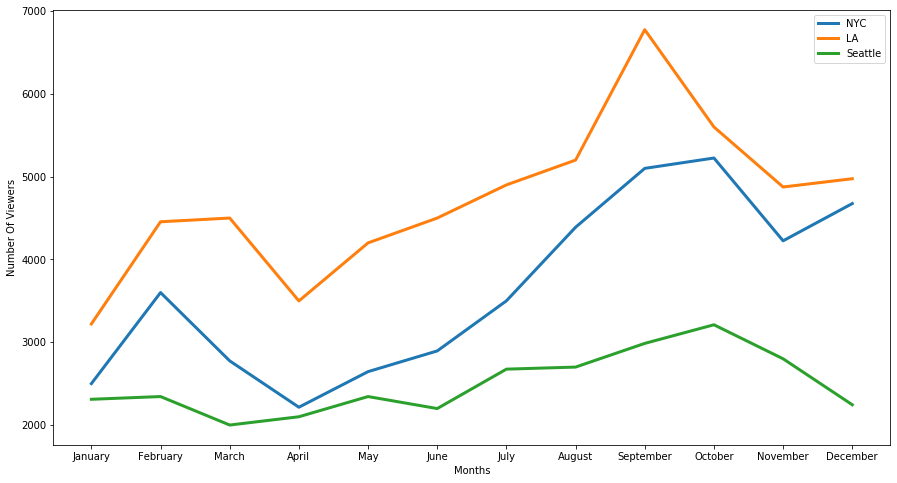

In [63]:
#### Pradnya's Part ####

# Visitors/customers based on different cities
A = df2 ['Months']
#print(A)
B = df2 ['NYC']
#print(B)
C = df2['LA']
#print(C)
D = df2 ['Seattle']
#print(D)

def Brand_Value(P,Q,R,S):
    plt.figure(figsize=(15,8))
    plt.plot(A, B, linewidth=3.0,label= 'NYC')
    plt.plot(A, C, linewidth=3.0,label= 'LA')
    plt.plot(A, D, linewidth=3.0,label= 'Seattle')
    plt.xlabel('Months')
    plt.ylabel('Number Of Viewers')
    pylab.legend(loc='upper right')

Brand_Value(A,B,C,D)


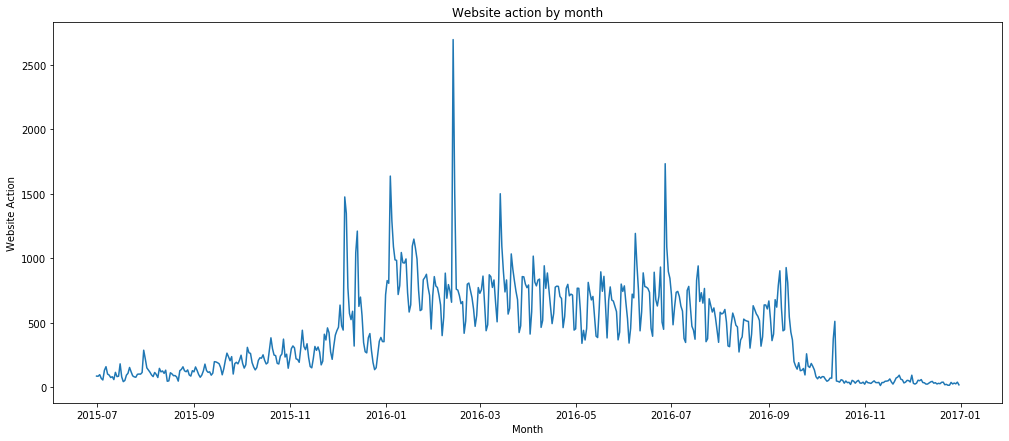

In [64]:
#website action
def website_action_graph(x,y):
    plt.figure(figsize=(17,7))
    plt.plot(x, y)
    plt.xlabel('Month')
    plt.ylabel('Website Action')
    plt.title('Website action by month')

website_action_graph(file['Date'], file['Website_action'])

In [65]:
#### Heena's Part ####

# potential user by week - Top 10 weeks with maximum number of potential users.
def potential_user(data):
    df = data.groupby(['week', 'Potential_Customers'], as_index=False).sum().groupby('week')['Potential_Customers'].sum().reset_index()
    
    x = df['week'];
    y = df['Potential_Customers']
    
    result = df.sort_values("Potential_Customers", ascending = False)[0:10]
    result['week'] = result['week'].astype(str)

    topWeeks = result['week'].str.cat(sep=',');
    print(f' Top 10 weeks with maximum number of potential users {topWeeks} This information tells us that during these ten weeks maximum people visited the brand’s website after having read the article associated with the brand. These people can be considered as potential customers as they have shown interest in the brand and visited the website. Based on this information, PR team can identify which articles or blogs they posted during these ten weeks, that persuaded more people to visit their brand’s website and they can create similar content in the future')
    print(result)
    
    data = go.Data([go.scatter(x=x,
                y=y,
                name="Potential customers",
                mode='lines',
                marker=dict(color='#A2D5F2'))])
    # Edit the layout
    layout = dict(title = "Expected Potential Customers per week",
              xaxis = dict(title = 'Week'),
              yaxis = dict(title = 'Articles')
              )
    fig = dict(data=data, layout=layout)
    py.iplot(fig)

#     plt.figure(figsize=(27,14)) 
    
#     plt.plot(x, y, color='green', linewidth = 2, marker='o', markerfacecolor='blue', markersize=8) 
#     plt.xlabel('Week Number',fontsize=30) 
#     plt.ylabel('Total potential customers that week',fontsize=30) 
#     plt.title('Expected Potential Customers per week',fontsize=30) 
#     plt.xticks(rotation=0)
#     plt.xticks(fontsize=30) 
#     plt.yticks(fontsize=30)
#     plt.show()

    
potential_user(potential_customers_2016)

 Top 10 weeks with maximum number of potential users 36,38,27,5,13,33,46,34,16,26 This information tells us that during these ten weeks maximum people visited the brand’s website after having read the article associated with the brand. These people can be considered as potential customers as they have shown interest in the brand and visited the website. Based on this information, PR team can identify which articles or blogs they posted during these ten weeks, that persuaded more people to visit their brand’s website and they can create similar content in the future
   week  Potential_Customers
35   36                  133
37   38                  130
26   27                  127
4     5                  125
12   13                  125
32   33                  123
45   46                  119
33   34                  118
15   16                  116
25   26                  115


TypeError: 'module' object is not callable

In [69]:
#update month
def setyear(row):
    if row == 1:
        return "Jan"
    if row == 2:
        return "Feb"
    if row == 3:
        return "Mar"
    if row == 4:
        return "Apr"
    if row == 5:
        return "May"
    if row == 6:
        return "Jun"
    if row == 7:
        return "Jul"
    if row == 8:
        return "Aug"
    if row == 9:
        return "Sep"
    if row == 10:
        return "Oct"
    if row == 11:
        return "Nov"
    if row == 12:
        return "Dec"


In [70]:
potential_customers_2016

,Date,Website_action,Media,FrequencyOfVoice,Potential_Customers,Articles_per_month,Positive_reviews,Negative_reviews,Year,Month,day,week
184,2016-01-01,716,Reddit,20,23,5,30,27,2016,1,1,53
185,2016-01-02,826,NYT,15,25,3,33,37,2016,1,2,53
186,2016-01-03,805,NBC,59,19,6,33,16,2016,1,3,53
187,2016-01-04,1637,Investopedia,53,18,6,28,32,2016,1,4,1
188,2016-01-05,1290,Google,57,14,6,20,35,2016,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
545,2016-12-27,24,Facebook,19,20,1,24,29,2016,12,27,52
546,2016-12-28,31,Reddit,19,8,6,19,40,2016,12,28,52
547,2016-12-29,25,NYT,58,19,7,29,28,2016,12,29,52
548,2016-12-30,38,NBC,58,14,2,24,17,2016,12,30,52


In [71]:
article_file

,Month,Website_action,FrequencyOfVoice,Potential_Customers,Articles_per_month,Positive_reviews,Negative_reviews,Year,day,week
0,None,27215,1089,503,139,793,833,62496,496,229
1,None,22592,1020,460,123,680,784,58464,435,191
2,None,23834,1067,474,147,730,820,62496,496,337
3,None,20955,992,509,174,690,826,60480,465,456
4,None,18891,1000,489,139,767,846,62496,496,607
5,None,22225,1040,475,168,719,777,60480,465,718
6,None,18532,1098,517,165,779,818,62496,496,876
7,None,15254,1097,500,161,758,710,62496,496,1015
8,None,11759,943,514,153,739,845,60480,465,1112
9,None,2362,929,510,174,744,819,62496,496,1284


In [41]:
import plotly.express as px
tips = px.data.tips()
fig = px.bar(tips, x="sex", y="total_bill", color='time')
fig.show()

In [74]:
# replace month
article_file = potential_customers_2016.groupby(['Month']).sum().reset_index()
#article_file1 = potential_customers_2016.groupby(['Month']).count().reset_index()
article_file.head()
article_file['Month'] = article_file['Month'].apply(lambda row: setyear(row))


def graph(xaxis,yaxis):
    plt.figure(figsize = (10,8))
    data = go.Data([go.Bar(x=xaxis,
                y=yaxis,
                name="Number of articles",
                marker=dict(color='#A2D5F2'))])
    # Edit the layout
    layout = dict(title = "Publication Activity by month",
              xaxis = dict(title = 'Month'),
              yaxis = dict(title = 'Articles')
              )
    fig = dict(data=data, layout=layout)
    py.iplot(fig)
    
print("The below plot shows the number articles posted by each month in different media. When compared to other months, there are a greater number of articles posted in April, October, June, July months. Based on this We can also calculate the Potential customers for each month by calculating how many people are visiting websites after seeing the article and which media posting a greater number of articles.")

print(pd.DataFrame(article_file, columns = ["Month","Articles_per_month"]))

graph(article_file['Month'],article_file['Articles_per_month'])




The below plot shows the number articles posted by each month in different media. When compared to other months, there are a greater number of articles posted in April, October, June, July months. Based on this We can also calculate the Potential customers for each month by calculating how many people are visiting websites after seeing the article and which media posting a greater number of articles.
   Month  Articles_per_month
0    Jan                 139
1    Feb                 123
2    Mar                 147
3    Apr                 174
4    May                 139
5    Jun                 168
6    Jul                 165
7    Aug                 161
8    Sep                 153
9    Oct                 174
10   Nov                 132
11   Dec                 143


<Figure size 720x576 with 0 Axes>

In [83]:
article_file1 = potential_customers_2016.groupby(['Month']).count().reset_index()
article_file1.head(5)

,Month,Date,Website_action,Media,FrequencyOfVoice,Potential_Customers,Articles_per_month,Positive_reviews,Negative_reviews,Year,day,week
0,1,31,31,31,31,31,31,31,31,31,31,31
1,2,29,29,29,29,29,29,29,29,29,29,29
2,3,31,31,31,31,31,31,31,31,31,31,31
3,4,30,30,30,30,30,30,30,30,30,30,30
4,5,31,31,31,31,31,31,31,31,31,31,31


In [84]:
article_file1['Month'] = article_file1['Month'].apply(lambda row: setyear(row))

In [85]:
print(pd.DataFrame(article_file1, columns = ["Month","Media"]))

   Month  Media
0    Jan     31
1    Feb     29
2    Mar     31
3    Apr     30
4    May     31
5    Jun     30
6    Jul     31
7    Aug     31
8    Sep     30
9    Oct     31
10   Nov     30
11   Dec     31


In [82]:
## This one not working ##

pie_file = potential_customers_2016.groupby(['Media']).sum().reset_index()
pie_file.head()

#powerofvoice
def website_action_graph(x,y):
    plt.figure(figsize = (10,8))
    
# Plot
    data = go.Data([go.Pie(labels=x,values= y, hole=.3)])
    # Edit the layout
    layout = dict(title = "Pie Chart for frequency of voice generated by different media",
              xaxis = dict(title = 'Media'),
              yaxis = dict(title = 'FrequencyOfVoice'),
              )
    fig = dict(data=data, layout=layout)
    py.iplot(fig)
website_action_graph(pie_file['Media'], pie_file['FrequencyOfVoice'])

<Figure size 720x576 with 0 Axes>

In [46]:
pie_file

,Media,Website_action,FrequencyOfVoice,Potential_Customers,Articles_per_month,Positive_reviews,Negative_reviews,Year,Month,day,week
0,Facebook,23040,1465,744,215,1143,1150,92736,302,695,1212
1,Google,26681,1614,803,245,1169,1273,96768,315,795,1274
2,Instagram,24950,1510,740,260,1132,1159,94752,304,781,1228
3,Investopedia,20233,1407,622,183,921,1003,74592,240,608,969
4,NBC,23394,1468,749,255,1128,1198,94752,305,774,1285
5,NYT,22274,1634,723,238,1118,1311,94752,305,727,1278
6,Reddit,22786,1457,767,218,1155,1345,94752,305,680,1272
7,Twitter,22593,1587,771,204,1161,1310,94752,308,707,1235


In [55]:

import plotly
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
trace_a = go.Bar(x=article_file['Month'],
                y=article_file['Positive_reviews'],
                name="Positive reviews",
                marker=dict(color='#A2D5F2'))

trace_b = go.Bar(x=article_file['Month'],
                y=article_file['Negative_reviews'],
                name="Negative reviews",
                marker=dict(color='#FFCDD2'),
                text = "sdgsd")
    

data3 = go.Data([trace_a,trace_b])

# Edit the layout
layout = dict(title = "Positive and Negative reviews by month",
              xaxis = dict(title = 'Month'),
              yaxis = dict(title = 'Review Count'),
              )

fig = dict(data=data3, layout=layout)
py.iplot(fig)

In [54]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
import pandas as pd
 
app = dash.Dash()
 
df = article_file
 
features = df.columns
app.layout = html.Div([
    html.Div([
        html.Div([
            html.Label('Choose Column'),
            dcc.Dropdown(
                id='xaxis',
                options=[{'label': i.title(), 'value': i} for i in features],
                value='Month'
            )
        ],
        style={'width': '48%', 'display': 'inline-block'}),
 
        html.Div([
            html.Label('Choose Column'),
            dcc.Dropdown(
                id='yaxis',
                options=[{'label': i.title(), 'value': i} for i in features],
                value='Positive_reviews'
            )
        ],style={'width': '48%', 'float': 'right', 'display': 'inline-block'})
    ]),
 
    dcc.Graph(id='feature-graphic')
], style={'padding':10})
 
@app.callback(
    Output('feature-graphic', 'figure'),
    [Input('xaxis', 'value'),
     Input('yaxis', 'value')])
def update_graph(xaxis_name, yaxis_name):

        trace_a = go.Bar(x=article_file['Month'],
                y=article_file['Positive_reviews'],
                name="Positive reviews",
                marker=dict(color='#A2D5F2'))
        trace_b = go.Bar(x=article_file['Month'],
                y=article_file['Negative_reviews'],
                name="Negative reviews",
                marker=dict(color='#FFCDD2'),
                text = "sdgsd")
        return {
            'data': go.Data([trace_a,trace_b]),
            'layout': go.Layout(
                xaxis={'title': xaxis_name},
                yaxis={'title': yaxis_name},
                margin={'l': 40, 'b': 40, 't': 10, 'r': 0},
                hovermode='closest'        
                
        )
    }
    
    elif yaxis_name == article_file['Articles_per_month']:
        trace = go.Bar(x=article_file['Month'],
                y=article_file['Articles_per_month'],
                name="Number of articles",
                marker=dict(color='#A2D5F2'))
        return {
            'data' : go.Data([trace]),
            'layout': go.Layout(
                xaxis={'title': Week},
                yaxis={'title': Articles},
                margin={'l': 40, 'b': 40, 't': 10, 'r': 0},
                hovermode='closest'        
                
        )
    }
    
if __name__ == '__main__':
    app.run_server()

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 64)